In [14]:
import os
import random
import requests
import pandas as pd
from pprint import pformat

url = 'https://api-dev.lollllz.com'

# Base Headers
headers = {
    'user_secret': 'a5aed2a8-db80-4b22-bf72-11f2d0765572',
    'govteam_secret': 'mock-secret'
}

In [15]:
# scp -r cmenghin@sshcampus.ccv.brown.edu:/users/cmenghin/data/bats/datasets/lwll/development/UCMerced_LandUse /Users/menga/Desktop/github/zsl_taglets

In [16]:
session_config = {
     "data_type": "sample",
    "task_id": "problem_test_zsl_2", "ZSL": True
}

In [17]:
session_token = requests.post(
    f"{url}/auth/create_session", json=session_config, headers=headers
).json()["session_token"]


In [18]:
session_headers = {"session_token": session_token, **headers}

In [19]:
session_status = requests.get(
    f"{url}/session_status",
    headers=session_headers
).json()["Session_Status"]

In [20]:
# Add all labeled files to a list for use in training
classes = session_status["current_dataset"]["classes"]
seen_classes = session_status["current_dataset"]["seen_classes"]
unseen_classes = session_status["current_dataset"]["unseen_classes"]

In [21]:
labeled_files = {class_: set() for class_ in classes}
labeled_files

{'forest': set(),
 'buildings': set(),
 'river': set(),
 'mobile_home_park': set(),
 'harbor': set(),
 'golf_course': set(),
 'agricultural': set(),
 'runway': set(),
 'baseball_diamond': set(),
 'overpass': set(),
 'chaparral': set(),
 'tennis_court': set(),
 'intersection': set(),
 'airplane': set(),
 'parking_lot': set(),
 'sparse_residential': set(),
 'medium_residential': set(),
 'dense_residential': set(),
 'beach': set(),
 'freeway': set(),
 'storage_tanks': set()}

In [22]:
labeled_examples = requests.get(f"{url}/get_seen_labels",
                                headers=session_headers).json()["Labels"]

In [30]:
seed_labels = [(image["id"], image["class"]) for image in labeled_examples]

In [32]:
a_list, b_list = zip(*seed_labels)

In [35]:
a_list

('img_1337.jpg',
 'img_51.jpg',
 'img_1376.jpg',
 'img_1070.jpg',
 'img_93.jpg',
 'img_760.jpg',
 'img_808.jpg',
 'img_863.jpg',
 'img_720.jpg',
 'img_666.jpg',
 'img_398.jpg',
 'img_885.jpg',
 'img_960.jpg',
 'img_1202.jpg',
 'img_1384.jpg',
 'img_1075.jpg',
 'img_560.jpg',
 'img_1109.jpg',
 'img_403.jpg',
 'img_1153.jpg',
 'img_1176.jpg',
 'img_487.jpg',
 'img_770.jpg',
 'img_968.jpg',
 'img_1355.jpg',
 'img_26.jpg',
 'img_896.jpg',
 'img_1242.jpg',
 'img_1011.jpg',
 'img_1062.jpg',
 'img_114.jpg',
 'img_980.jpg',
 'img_723.jpg',
 'img_57.jpg',
 'img_672.jpg',
 'img_961.jpg',
 'img_1041.jpg',
 'img_643.jpg',
 'img_322.jpg',
 'img_368.jpg',
 'img_861.jpg',
 'img_1269.jpg',
 'img_1172.jpg',
 'img_84.jpg',
 'img_621.jpg',
 'img_972.jpg',
 'img_663.jpg',
 'img_784.jpg',
 'img_1036.jpg',
 'img_583.jpg',
 'img_860.jpg',
 'img_1233.jpg',
 'img_804.jpg',
 'img_1338.jpg',
 'img_837.jpg',
 'img_768.jpg',
 'img_920.jpg',
 'img_206.jpg',
 'img_542.jpg',
 'img_660.jpg',
 'img_500.jpg',
 'img_994.

In [23]:
labeled_examples

[{'id': 'img_1337.jpg', 'class': 'buildings'},
 {'id': 'img_51.jpg', 'class': 'overpass'},
 {'id': 'img_1376.jpg', 'class': 'tennis_court'},
 {'id': 'img_1070.jpg', 'class': 'baseball_diamond'},
 {'id': 'img_93.jpg', 'class': 'chaparral'},
 {'id': 'img_760.jpg', 'class': 'chaparral'},
 {'id': 'img_808.jpg', 'class': 'beach'},
 {'id': 'img_863.jpg', 'class': 'beach'},
 {'id': 'img_720.jpg', 'class': 'overpass'},
 {'id': 'img_666.jpg', 'class': 'chaparral'},
 {'id': 'img_398.jpg', 'class': 'tennis_court'},
 {'id': 'img_885.jpg', 'class': 'baseball_diamond'},
 {'id': 'img_960.jpg', 'class': 'chaparral'},
 {'id': 'img_1202.jpg', 'class': 'medium_residential'},
 {'id': 'img_1384.jpg', 'class': 'medium_residential'},
 {'id': 'img_1075.jpg', 'class': 'parking_lot'},
 {'id': 'img_560.jpg', 'class': 'runway'},
 {'id': 'img_1109.jpg', 'class': 'sparse_residential'},
 {'id': 'img_403.jpg', 'class': 'beach'},
 {'id': 'img_1153.jpg', 'class': 'parking_lot'},
 {'id': 'img_1176.jpg', 'class': 'sparse

In [110]:
for example in labeled_examples:
    class_name, file = example["class"], example["id"]
    labeled_files[class_name].add(file)

The field `classes` contains both seen and unseen

In [111]:
# Obtain ZSL descriptions (optional)
zsl_descriptions = session_status["current_dataset"]["zsl_description"]
unseen_descriptions = {k:desc for k, desc in zsl_descriptions.items() \
                       if k in unseen_classes}
seen_descriptions = {k:desc for k, desc in zsl_descriptions.items() \
                     if k in seen_classes}

In [24]:
# To train model with images from unseen classes, can do something like this:
unseen_files = requests.get(f"{url}/get_unseen_ids", headers=session_headers).json()#["ids"]

In [29]:
unseen_files['ids']

['img_427.jpg',
 'img_688.jpg',
 'img_1086.jpg',
 'img_483.jpg',
 'img_780.jpg',
 'img_37.jpg',
 'img_379.jpg',
 'img_1448.jpg',
 'img_707.jpg',
 'img_1054.jpg',
 'img_649.jpg',
 'img_1189.jpg',
 'img_632.jpg',
 'img_474.jpg',
 'img_1257.jpg',
 'img_1005.jpg',
 'img_1327.jpg',
 'img_681.jpg',
 'img_1098.jpg',
 'img_1169.jpg',
 'img_1401.jpg',
 'img_1239.jpg',
 'img_650.jpg',
 'img_556.jpg',
 'img_1220.jpg',
 'img_25.jpg',
 'img_767.jpg',
 'img_1148.jpg',
 'img_897.jpg',
 'img_527.jpg',
 'img_617.jpg',
 'img_1308.jpg',
 'img_581.jpg',
 'img_1029.jpg',
 'img_1232.jpg',
 'img_683.jpg',
 'img_1447.jpg',
 'img_27.jpg',
 'img_517.jpg',
 'img_1064.jpg',
 'img_1033.jpg',
 'img_1107.jpg',
 'img_1003.jpg',
 'img_1246.jpg',
 'img_838.jpg',
 'img_657.jpg',
 'img_1346.jpg',
 'img_1214.jpg',
 'img_1341.jpg',
 'img_698.jpg',
 'img_1009.jpg',
 'img_1166.jpg',
 'img_1377.jpg',
 'img_1291.jpg',
 'img_682.jpg',
 'img_574.jpg',
 'img_1181.jpg',
 'img_8.jpg',
 'img_714.jpg',
 'img_1034.jpg',
 'img_803.jpg'

In [113]:
len(unseen_files)

80

In [114]:
dataset = session_status["current_dataset"]["name"]
dataset

'UCMerced_LandUse'

In [115]:
data_root = '../'

In [116]:
test_folder = os.path.join(data_root, dataset, 
                           f"{dataset}_{session_config['data_type']}",
                           "test"
                          )

In [117]:
test_folder

'../UCMerced_LandUse/UCMerced_LandUse_sample/test'

In [118]:
test_files = os.listdir(test_folder)
#test_files = [str(random.choice(classes)) for _ in range(100)]

In [25]:
#test_files = [int(i.split('_')[-1].split('.')[0]) for i in test_files]

In [46]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"


In [47]:
CUSTOM_TEMPLATES = {'UCMerced_LandUse': 'a photo of a'}
prompts = [f"{CUSTOM_TEMPLATES[dataset]} {' '.join(i.split('_'))}" \
           for i in unseen_classes] #a photo of a {i} might display 

In [48]:
model, preprocess = clip.load("ViT-B/32", device=device)

text = clip.tokenize(prompts).to(device)
text_features = model.encode_text(text)

In [57]:
preds = []
for en, i in enumerate(test_files):
    image = preprocess(Image.open(f"{test_folder}/{i}")).unsqueeze(0).to(device)
    with torch.no_grad():
        image_features = model.encode_image(image)
        logits_per_image, logits_per_text = model(image, text)
        probs = logits_per_image.softmax(dim=-1).cpu().numpy()
        preds.append(unseen_classes[np.argmax(probs)])
    
    if en % 10 == 0:
        print(en)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


In [119]:
standard_pred_df = pd.DataFrame({'id': test_files, 'class': preds})

In [91]:
CUSTOM_TEMPLATES = {'UCMerced_LandUse': 'a photo of a'}
prompts = [f"{CUSTOM_TEMPLATES[dataset]} {' '.join(i.split('_'))}" \
           for i in classes] #a photo of a {i} might display 

In [92]:
model, preprocess = clip.load("ViT-B/32", device=device)

text = clip.tokenize(prompts).to(device)
text_features = model.encode_text(text)

In [93]:
preds = []
for en, i in enumerate(test_files):
    image = preprocess(Image.open(f"{test_folder}/{i}")).unsqueeze(0).to(device)
    with torch.no_grad():
        image_features = model.encode_image(image)
        logits_per_image, logits_per_text = model(image, text)
        probs = logits_per_image.softmax(dim=-1).cpu().numpy()
        preds.append(classes[np.argmax(probs)])
    
    if en % 10 == 0:
        print(en)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


In [120]:
generalized_pred_df = pd.DataFrame({'id': test_files, 'class': preds})

In [121]:
standard_response = requests.post(
    f"{url}/submit_standard_zsl_predictions",
    json={"predictions": standard_pred_df.to_dict()},
    headers=session_headers,
).json()

generalized_response = requests.post(
    f"{url}/submit_predictions",
    json={"predictions": generalized_pred_df.to_dict()},
    headers=session_headers,
).json()

In [122]:
standard_response['Session_Status']['standard_zsl_scores']

{'accuracy_unseen_std': 0.6131386861313869,
 'top_5_accuracy_unseen_std': 0.6131386861313869,
 'roc_auc_unseen_std': None,
 'average_per_class_recall_unseen_std': 0.608714804990667}

In [123]:
generalized_response['Session_Status']['checkpoint_scores']

[{'accuracy_all_classes': 0.6,
  'top_5_accuracy_all_classes': 0.6,
  'roc_auc_all_classes': 0.7890931012940654,
  'average_per_class_recall_all_classes': 0.5982404189738305,
  'accuracy_seen': 0.5950413223140496,
  'top_5_accuracy_seen': 0.5950413223140496,
  'roc_auc_seen': None,
  'average_per_class_recall_seen': 0.5949671733435691,
  'accuracy_unseen': 0.6131386861313869,
  'top_5_accuracy_unseen': 0.6131386861313869,
  'roc_auc_unseen': None,
  'average_per_class_recall_unseen': 0.608714804990667}]

In [241]:
# Separating class names: a photo of a {i} might display {seen_descriptions[i]}
np.sum(np.array(preds) == np.array(seen_labels))/len(seen_labels)

0.69921875

In [111]:
# Separating the class names (only names)
np.sum(np.array(preds) == np.array(seen_labels))/len(seen_labels)

0.6796875

In [106]:
# Separating the class names with a photo of
np.sum(np.array(preds) == np.array(seen_labels))/len(seen_labels)

0.71484375

In [97]:
# Using only the coumpond of class names
np.sum(np.array(preds) == np.array(seen_labels))/len(seen_labels)

0.609375

In [101]:
# Using compound names plus a photo of
np.sum(np.array(preds) == np.array(seen_labels))/len(seen_labels)

0.64453125

<Figure size 1080x1080 with 0 Axes>

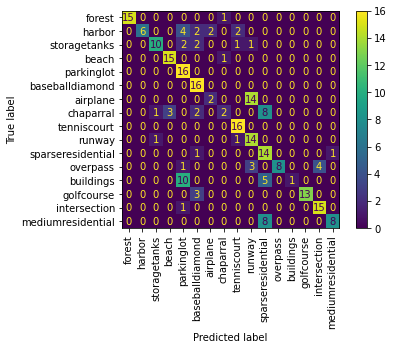

In [150]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cm = confusion_matrix(seen_labels, preds, labels=seen_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=seen_classes)
plt.figure(figsize=(15,15))
disp.plot()

plt.xticks(rotation=90)
plt.show()

<Figure size 1080x1080 with 0 Axes>

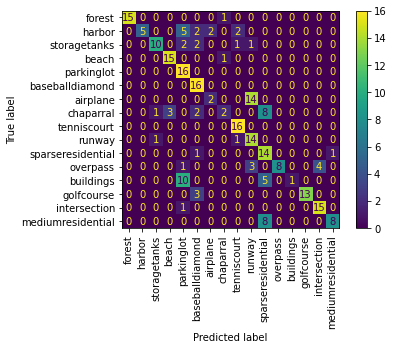

In [144]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cm = confusion_matrix(seen_labels, preds, labels=seen_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=seen_classes)
plt.figure(figsize=(15,15))
disp.plot()

plt.xticks(rotation=90)
plt.show()

In [145]:
prompts

['a photo of a forest might display dense growth of trees, large areas of land, green area, possibly a network of roads or trails',
 'a photo of a harbor might display sheltered area of water, ships along a coast or at the mouth of a river, small or large body of water with docks, piers.',
 'a photo of a storage tanks might display large, round, cylindrical or rectangular containers used for storing liquids or gases, often made of metal or concrete, surrounded by pipelines, valves, or fencing.',
 'a photo of a beach might display A strip of land along a body of water, typically a sea or ocean, that is covered by sand or small rocks, wide, light-colored strip.',
 'a photo of a parking lot might display A large, open area with vehicles, rectangular or square-shaped area with a grid of marked spaces, often surrounded by roads.',
 'a photo of a baseball diamond might display A a diamond-shaped infield with bases at each corner and an outfield, small, oval-shaped field with distinctive mark

In [247]:
import sqlite3

In [261]:
file = '../2021_eval_scads.sqlite3'

In [262]:
# Create a SQL connection to our SQLite database
con = sqlite3.connect(file)
cur = con.cursor()

In [268]:
for row in cur.execute('SELECT * FROM Images WHERE path like "imagenet_22k%";'):
    print(row)

(4676347, 35, 4990154, 'imagenet_22k/imagenet_22k_full/train/n04116294_1749.JPEG')
(4676348, 35, 4990154, 'imagenet_22k/imagenet_22k_full/train/n04116294_11747.JPEG')
(4676349, 35, 4990154, 'imagenet_22k/imagenet_22k_full/train/n04116294_1410.JPEG')
(4676350, 35, 4990154, 'imagenet_22k/imagenet_22k_full/train/n04116294_6685.JPEG')
(4676351, 35, 4990154, 'imagenet_22k/imagenet_22k_full/train/n04116294_8326.JPEG')
(4676352, 35, 4990154, 'imagenet_22k/imagenet_22k_full/train/n04116294_3802.JPEG')
(4676353, 35, 4990154, 'imagenet_22k/imagenet_22k_full/train/n04116294_964.JPEG')
(4676354, 35, 4990154, 'imagenet_22k/imagenet_22k_full/train/n04116294_3852.JPEG')
(4676355, 35, 4990154, 'imagenet_22k/imagenet_22k_full/train/n04116294_2313.JPEG')
(4676356, 35, 4990154, 'imagenet_22k/imagenet_22k_full/train/n04116294_2996.JPEG')
(4676357, 35, 4990154, 'imagenet_22k/imagenet_22k_full/train/n04116294_6017.JPEG')
(4676358, 35, 4990154, 'imagenet_22k/imagenet_22k_full/train/n04116294_5981.JPEG')
(467

(4678300, 35, 582469, 'imagenet_22k/imagenet_22k_full/train/n03378174_8000.JPEG')
(4678301, 35, 582469, 'imagenet_22k/imagenet_22k_full/train/n03378174_1172.JPEG')
(4678302, 35, 582469, 'imagenet_22k/imagenet_22k_full/train/n03378174_4859.JPEG')
(4678303, 35, 582469, 'imagenet_22k/imagenet_22k_full/train/n03378174_17651.JPEG')
(4678304, 35, 582469, 'imagenet_22k/imagenet_22k_full/train/n03378174_6993.JPEG')
(4678305, 35, 582469, 'imagenet_22k/imagenet_22k_full/train/n03378174_9378.JPEG')
(4678306, 35, 582469, 'imagenet_22k/imagenet_22k_full/train/n03378174_4618.JPEG')
(4678307, 35, 582469, 'imagenet_22k/imagenet_22k_full/train/n03378174_9206.JPEG')
(4678308, 35, 582469, 'imagenet_22k/imagenet_22k_full/train/n03378174_3267.JPEG')
(4678309, 35, 582469, 'imagenet_22k/imagenet_22k_full/train/n03378174_2559.JPEG')
(4678310, 35, 582469, 'imagenet_22k/imagenet_22k_full/train/n03378174_12084.JPEG')
(4678311, 35, 582469, 'imagenet_22k/imagenet_22k_full/train/n03378174_5001.JPEG')
(4678312, 35, 

(4679313, 35, 38319, 'imagenet_22k/imagenet_22k_full/train/n04115802_4793.JPEG')
(4679314, 35, 38319, 'imagenet_22k/imagenet_22k_full/train/n04115802_2366.JPEG')
(4679315, 35, 38319, 'imagenet_22k/imagenet_22k_full/train/n04115802_1816.JPEG')
(4679316, 35, 38319, 'imagenet_22k/imagenet_22k_full/train/n04115802_7411.JPEG')
(4679317, 35, 38319, 'imagenet_22k/imagenet_22k_full/train/n04115802_2316.JPEG')
(4679318, 35, 38319, 'imagenet_22k/imagenet_22k_full/train/n04115802_9041.JPEG')
(4679319, 35, 38319, 'imagenet_22k/imagenet_22k_full/train/n04115802_12651.JPEG')
(4679320, 35, 38319, 'imagenet_22k/imagenet_22k_full/train/n04115802_12999.JPEG')
(4679321, 35, 38319, 'imagenet_22k/imagenet_22k_full/train/n04115802_4710.JPEG')
(4679322, 35, 38319, 'imagenet_22k/imagenet_22k_full/train/n04115802_4497.JPEG')
(4679323, 35, 38319, 'imagenet_22k/imagenet_22k_full/train/n04115802_11095.JPEG')
(4679324, 35, 38319, 'imagenet_22k/imagenet_22k_full/train/n04115802_12826.JPEG')
(4679325, 35, 38319, 'im

(4680628, 35, 124670, 'imagenet_22k/imagenet_22k_full/train/n10155849_42555.JPEG')
(4680629, 35, 124670, 'imagenet_22k/imagenet_22k_full/train/n10155849_31024.JPEG')
(4680630, 35, 124670, 'imagenet_22k/imagenet_22k_full/train/n10155849_47510.JPEG')
(4680631, 35, 124670, 'imagenet_22k/imagenet_22k_full/train/n10155849_41428.JPEG')
(4680632, 35, 124670, 'imagenet_22k/imagenet_22k_full/train/n10155849_6272.JPEG')
(4680633, 35, 124670, 'imagenet_22k/imagenet_22k_full/train/n10155849_20484.JPEG')
(4680634, 35, 124670, 'imagenet_22k/imagenet_22k_full/train/n10155849_49928.JPEG')
(4680635, 35, 124670, 'imagenet_22k/imagenet_22k_full/train/n10155849_8577.JPEG')
(4680636, 35, 124670, 'imagenet_22k/imagenet_22k_full/train/n10155849_14457.JPEG')
(4680637, 35, 124670, 'imagenet_22k/imagenet_22k_full/train/n10155849_13058.JPEG')
(4680638, 35, 124670, 'imagenet_22k/imagenet_22k_full/train/n10155849_17940.JPEG')
(4680639, 35, 124670, 'imagenet_22k/imagenet_22k_full/train/n10155849_18668.JPEG')
(46806

(4681732, 35, 633399, 'imagenet_22k/imagenet_22k_full/train/n03711999_4421.JPEG')
(4681733, 35, 633399, 'imagenet_22k/imagenet_22k_full/train/n03711999_7641.JPEG')
(4681734, 35, 633399, 'imagenet_22k/imagenet_22k_full/train/n03711999_8281.JPEG')
(4681735, 35, 633399, 'imagenet_22k/imagenet_22k_full/train/n03711999_8091.JPEG')
(4681736, 35, 633399, 'imagenet_22k/imagenet_22k_full/train/n03711999_3955.JPEG')
(4681737, 35, 633399, 'imagenet_22k/imagenet_22k_full/train/n03711999_7801.JPEG')
(4681738, 35, 633399, 'imagenet_22k/imagenet_22k_full/train/n03711999_5028.JPEG')
(4681739, 35, 633399, 'imagenet_22k/imagenet_22k_full/train/n03711999_4441.JPEG')
(4681740, 35, 633399, 'imagenet_22k/imagenet_22k_full/train/n03711999_6134.JPEG')
(4681741, 35, 633399, 'imagenet_22k/imagenet_22k_full/train/n03711999_3555.JPEG')
(4681742, 35, 633399, 'imagenet_22k/imagenet_22k_full/train/n03711999_7254.JPEG')
(4681743, 35, 633399, 'imagenet_22k/imagenet_22k_full/train/n03711999_6996.JPEG')
(4681744, 35, 63

(4683402, 35, 169292, 'imagenet_22k/imagenet_22k_full/train/n00451370_10878.JPEG')
(4683403, 35, 169292, 'imagenet_22k/imagenet_22k_full/train/n00451370_383.JPEG')
(4683404, 35, 169292, 'imagenet_22k/imagenet_22k_full/train/n00451370_545.JPEG')
(4683405, 35, 169292, 'imagenet_22k/imagenet_22k_full/train/n00451370_2907.JPEG')
(4683406, 35, 169292, 'imagenet_22k/imagenet_22k_full/train/n00451370_4353.JPEG')
(4683407, 35, 169292, 'imagenet_22k/imagenet_22k_full/train/n00451370_15392.JPEG')
(4683408, 35, 169292, 'imagenet_22k/imagenet_22k_full/train/n00451370_8795.JPEG')
(4683409, 35, 169292, 'imagenet_22k/imagenet_22k_full/train/n00451370_5648.JPEG')
(4683410, 35, 169292, 'imagenet_22k/imagenet_22k_full/train/n00451370_5798.JPEG')
(4683411, 35, 169292, 'imagenet_22k/imagenet_22k_full/train/n00451370_2526.JPEG')
(4683412, 35, 169292, 'imagenet_22k/imagenet_22k_full/train/n00451370_5070.JPEG')
(4683413, 35, 169292, 'imagenet_22k/imagenet_22k_full/train/n00451370_4714.JPEG')
(4683414, 35, 16

(4684610, 35, 132346, 'imagenet_22k/imagenet_22k_full/train/n04543158_6886.JPEG')
(4684611, 35, 132346, 'imagenet_22k/imagenet_22k_full/train/n04543158_3616.JPEG')
(4684612, 35, 132346, 'imagenet_22k/imagenet_22k_full/train/n04543158_7879.JPEG')
(4684613, 35, 132346, 'imagenet_22k/imagenet_22k_full/train/n04543158_6406.JPEG')
(4684614, 35, 132346, 'imagenet_22k/imagenet_22k_full/train/n04543158_9217.JPEG')
(4684615, 35, 132346, 'imagenet_22k/imagenet_22k_full/train/n04543158_6352.JPEG')
(4684616, 35, 132346, 'imagenet_22k/imagenet_22k_full/train/n04543158_17030.JPEG')
(4684617, 35, 132346, 'imagenet_22k/imagenet_22k_full/train/n04543158_8720.JPEG')
(4684618, 35, 132346, 'imagenet_22k/imagenet_22k_full/train/n04543158_18093.JPEG')
(4684619, 35, 132346, 'imagenet_22k/imagenet_22k_full/train/n04543158_5034.JPEG')
(4684620, 35, 132346, 'imagenet_22k/imagenet_22k_full/train/n04543158_20306.JPEG')
(4684621, 35, 132346, 'imagenet_22k/imagenet_22k_full/train/n04543158_13338.JPEG')
(4684622, 35

(4685765, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_1773.JPEG')
(4685766, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_5404.JPEG')
(4685767, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_5359.JPEG')
(4685768, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_719.JPEG')
(4685769, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_6945.JPEG')
(4685770, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_5389.JPEG')
(4685771, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_11607.JPEG')
(4685772, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_10678.JPEG')
(4685773, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_3449.JPEG')
(4685774, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_5155.JPEG')
(4685775, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_8090.JPEG')
(4685776, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_11414.JPEG')
(4

(4686735, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_13402.JPEG')
(4686736, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_2627.JPEG')
(4686737, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_7760.JPEG')
(4686738, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_10870.JPEG')
(4686739, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_12917.JPEG')
(4686740, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_2944.JPEG')
(4686741, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_315.JPEG')
(4686742, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_3325.JPEG')
(4686743, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_5470.JPEG')
(4686744, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_626.JPEG')
(4686745, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_2228.JPEG')
(4686746, 35, 1418303, 'imagenet_22k/imagenet_22k_full/train/n07581249_13356.JPEG')
(4

(4688309, 35, 779573, 'imagenet_22k/imagenet_22k_full/train/n04593077_459.JPEG')
(4688310, 35, 779573, 'imagenet_22k/imagenet_22k_full/train/n04593077_6380.JPEG')
(4688311, 35, 779573, 'imagenet_22k/imagenet_22k_full/train/n04593077_739.JPEG')
(4688312, 35, 779573, 'imagenet_22k/imagenet_22k_full/train/n04593077_1836.JPEG')
(4688313, 35, 779573, 'imagenet_22k/imagenet_22k_full/train/n04593077_7897.JPEG')
(4688314, 35, 779573, 'imagenet_22k/imagenet_22k_full/train/n04593077_7236.JPEG')
(4688315, 35, 779573, 'imagenet_22k/imagenet_22k_full/train/n04593077_674.JPEG')
(4688316, 35, 779573, 'imagenet_22k/imagenet_22k_full/train/n04593077_2897.JPEG')
(4688317, 35, 779573, 'imagenet_22k/imagenet_22k_full/train/n04593077_4209.JPEG')
(4688318, 35, 779573, 'imagenet_22k/imagenet_22k_full/train/n04593077_6969.JPEG')
(4688319, 35, 779573, 'imagenet_22k/imagenet_22k_full/train/n04593077_2154.JPEG')
(4688320, 35, 779573, 'imagenet_22k/imagenet_22k_full/train/n04593077_3424.JPEG')
(4688321, 35, 77957

(4689809, 35, 117555, 'imagenet_22k/imagenet_22k_full/train/n02871525_27723.JPEG')
(4689810, 35, 117555, 'imagenet_22k/imagenet_22k_full/train/n02871525_3962.JPEG')
(4689811, 35, 117555, 'imagenet_22k/imagenet_22k_full/train/n02871525_31288.JPEG')
(4689812, 35, 117555, 'imagenet_22k/imagenet_22k_full/train/n02871525_11763.JPEG')
(4689813, 35, 117555, 'imagenet_22k/imagenet_22k_full/train/n02871525_22896.JPEG')
(4689814, 35, 117555, 'imagenet_22k/imagenet_22k_full/train/n02871525_3224.JPEG')
(4689815, 35, 117555, 'imagenet_22k/imagenet_22k_full/train/n02871525_4761.JPEG')
(4689816, 35, 117555, 'imagenet_22k/imagenet_22k_full/train/n02871525_12666.JPEG')
(4689817, 35, 117555, 'imagenet_22k/imagenet_22k_full/train/n02871525_19103.JPEG')
(4689818, 35, 117555, 'imagenet_22k/imagenet_22k_full/train/n02871525_28218.JPEG')
(4689819, 35, 117555, 'imagenet_22k/imagenet_22k_full/train/n02871525_19680.JPEG')
(4689820, 35, 117555, 'imagenet_22k/imagenet_22k_full/train/n02871525_14644.JPEG')
(468982

KeyboardInterrupt: 

In [ ]:
python -m taglets.scads.create.install --db predefined/<current scads> --root <dataset root folder>  --newdata <name>

/users/cmenghin/data/bats/datasets/lwll/external/imagenet_22k/imagenet_22k_sample/test

In [ ]:
#!/bin/bash
#SBATCH --job-name=ic
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=8
#SBATCH --mem=64G
#SBATCH -t 04:00:00
##SBATCH -p gpu --gres=gpu:4
##SBATCH --exclude=gpu[717-718,1201-1204,1209,1403]
##SBATCH --partition=3090-gcondo

#module load cuda/9.2.148
#module load cuda/11.1.1
module load cuda/11.3.1 
module load python/3.7.4

pwd
source all_venv/last_eval/bin/activate

cd taglets-last-eval
python -m taglets.scads.interface.scads_embedding
